# EDA 

### 1. 데이터 불러오기

In [1]:
# 필요한 라이브러리 불러오기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')   #한글 깨지지 않도록 설정
plt.rc('axes', unicode_minus=False)

In [3]:
# box office 데이터 불러오기

boxoffice= pd.read_csv("C:/Users/강태희/Documents/BAF-25-2-Marketing/analysis/boxoffice_data.csv")
boxoffice.head()

,Movie_Title,Release_Date,Audience_Count,Show_Count,Week,Date,Holiday,Moonhwa,Pandemic,now_showing
0,#살아있다,2020-06-24,204066,7223,1,2020-06-24,0,1,1,0
1,#살아있다,2020-06-24,148991,7311,1,2020-06-25,0,0,1,0
2,#살아있다,2020-06-24,152550,7839,1,2020-06-26,0,0,1,0
3,#살아있다,2020-06-24,294255,9221,1,2020-06-27,1,0,1,0
4,#살아있다,2020-06-24,256133,9044,1,2020-06-28,1,0,1,0


#### 변수설명

- Movie_Title: 영화 제목
- Release_Date: 개봉일  (분기 별 개봉 영화 확인, 특히 연말 중요)
- Audience_Count: 일별 관객수 
- Show_Count: 일별 상영횟수 
- Week: 개봉주차	(총 관람객 수 별 개봉 주차 확인)
- Date: 박스오피스 집계 일자   
- Holiday: 휴일 구분(NO:0 , YES: 1)	
- Moonhwa: 문화가 있는 날
- Pandemic: 코로나 팬더믹(~ 2020년 1월 : 0 / 2020년 2월 ~ 2023년 5월 : 1 /2023년 6월 ~ : 2)	
- now_showing: 개봉중인 영화라면 1, 개봉이 끝난 영화라면 0

In [4]:
boxoffice.describe()

,Audience_Count,Show_Count,Week,Holiday,Moonhwa,Pandemic,now_showing
count,1.967990e+05,196799.000000,196799.000000,196799.000000,196799.000000,196799.000000,196799.000000
mean,9.409729e+03,294.883612,5.643743,0.321501,0.023537,0.513925,0.006133
std,4.338920e+04,877.635766,6.053239,0.467054,0.151601,0.757264,0.078074
min,0.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.800000e+01,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,1.200000e+02,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000
75%,1.157000e+03,92.000000,7.000000,1.000000,0.000000,1.000000,0.000000
max,1.661835e+06,17616.000000,117.000000,1.000000,1.000000,2.000000,1.000000


In [6]:
# 상영주차가 117주나 되는 영화가 무엇인지 찾아봄 
# 산상수훈 -117주동안 개봉되었다고 했으나 구글링해보니 4주까지의 개봉 정보밖에 없음

boxoffice[boxoffice["Week"]==117]

,Movie_Title,Release_Date,Audience_Count,Show_Count,Week,Date,Holiday,Moonhwa,Pandemic,now_showing
92732,산상수훈,2017-12-07,35,1,117,2020-02-29,1,0,1,0


In [ ]:
boxoffice[boxoffice["Movie_Title"]=="산상수훈"]

# 끝주차 당 일주일에 한번씩 스크린 상영
# 일단 이상치라고 파악해도 되지 않을까
# 밑에서 이상치 파악할 때 같이 확인해볼 것

,Movie_Title,Release_Date,Audience_Count,Show_Count,Week,Date,Holiday,Moonhwa,Pandemic,now_showing
92407,산상수훈,2017-12-07,3082,110,1,2017-12-07,0,0,0,0
92408,산상수훈,2017-12-07,3039,102,1,2017-12-08,0,0,0,0
92409,산상수훈,2017-12-07,2578,100,1,2017-12-09,1,0,0,0
92410,산상수훈,2017-12-07,2635,93,1,2017-12-10,1,0,0,0
92411,산상수훈,2017-12-07,5385,106,2,2017-12-11,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
92728,산상수훈,2017-12-07,35,1,114,2020-02-08,1,0,1,0
92729,산상수훈,2017-12-07,34,1,115,2020-02-15,1,0,1,0
92730,산상수훈,2017-12-07,1,1,116,2020-02-17,0,0,1,0
92731,산상수훈,2017-12-07,35,1,116,2020-02-22,1,0,1,0


In [6]:
boxoffice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196799 entries, 0 to 196798
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Movie_Title     196799 non-null  object
 1   Release_Date    196799 non-null  object
 2   Audience_Count  196799 non-null  int64 
 3   Show_Count      196799 non-null  int64 
 4   Week            196799 non-null  int64 
 5   Date            196799 non-null  object
 6   Holiday         196799 non-null  int64 
 7   Moonhwa         196799 non-null  int64 
 8   Pandemic        196799 non-null  int64 
 9   now_showing     196799 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 15.0+ MB


In [ ]:
# 결측값 확인하기 ---- 결측값 없음 확인
boxoffice.isnull().sum()

Movie_Title       0
Release_Date      0
Audience_Count    0
Show_Count        0
Week              0
Date              0
Holiday           0
Moonhwa           0
Pandemic          0
now_showing       0
dtype: int64

In [ ]:
# 중복된 행 여부 확인 ---중복행 없음 확인
boxoffice[boxoffice.duplicated(keep=False)]

,Movie_Title,Release_Date,Audience_Count,Show_Count,Week,Date,Holiday,Moonhwa,Pandemic,now_showing


### 2. 파생 변수 생성하기

- Total_Audience: 영화별 총 관람객 수 데이터 프레임 생성
- Cumulative_Audience = 영화별 누적 관객 수
- Week1_Week2_ratio = 2주차 관람객 수 / 1주차 관람객 수 (비율) or 1- (2주차 관람객 수 / 1주차 관람객 수) (감소율)
- 주차별 관객 수 

In [5]:
# 영화별 총 관람객수 변수 만들기

total_audience = (boxoffice.groupby('Movie_Title')['Audience_Count'].sum().reset_index(name='Total_Audience'))

In [6]:
# 원래 데이터프레임에 merge (영화별 총 관객 수 열 추가)
boxoffice = boxoffice.merge(total_audience, on='Movie_Title', how='left')

# 확인
print(boxoffice[['Movie_Title','Audience_Count','Total_Audience']].head(10))

  Movie_Title  Audience_Count  Total_Audience
0       #살아있다          204066         1899697
1       #살아있다          148991         1899697
2       #살아있다          152550         1899697
3       #살아있다          294255         1899697
4       #살아있다          256133         1899697
5       #살아있다           67845         1899697
6       #살아있다           67098         1899697
7       #살아있다           51659         1899697
8       #살아있다           44470         1899697
9       #살아있다           51860         1899697


In [ ]:
# 데이터 셋으로도 만들어두기 (그래프 그릴 용도)
Total_audience = total_audience.rename(columns={"Audience_Count": "Total_Audience"})
Total_audience.head()

In [31]:
# 지수표기 대신 일반 숫자로 표시
pd.options.display.float_format = '{:,.0f}'.format

Total_audience.describe()

# 중위수가 1만 5천, Q3가 15만명, 최대 관람객 수가 약 1759만명인것을 보아 총 관램객 수가 ~1만에 몰려있는걸 추정할 수 있음

,Total_Audience
count,"4,740"
mean,"390,680"
std,"1,245,024"
min,2
25%,"3,118"
50%,"15,457"
75%,"152,320"
max,"17,590,196"


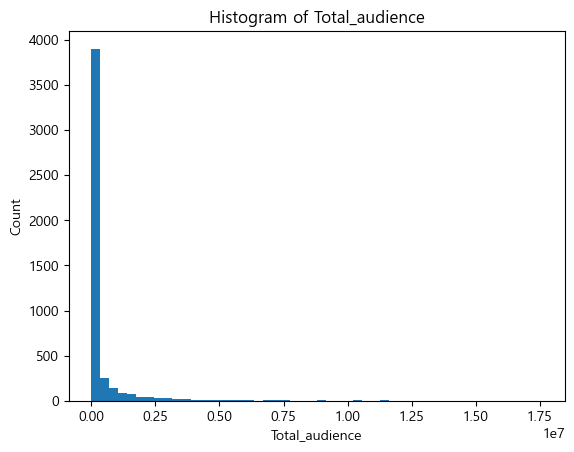

In [26]:
plt.figure()
plt.hist(Total_audience["Total_Audience"].dropna(), bins=50)
plt.title('Histogram of Total_audience')
plt.xlabel("Total_audience")
plt.ylabel('Count')
plt.show()

왼쪽에 몰려 있음----대부분의 영화는 관객 수가 아주 적은 편에 속한다는 걸 보여준다  
오른쪽 꼬리가 김----소수의 영화만이 수백만 ~ 천만 관객 이상을 기록  
문제 ----- 분포의 대칭성이 너무 떨어짐. 로그 변환 필요

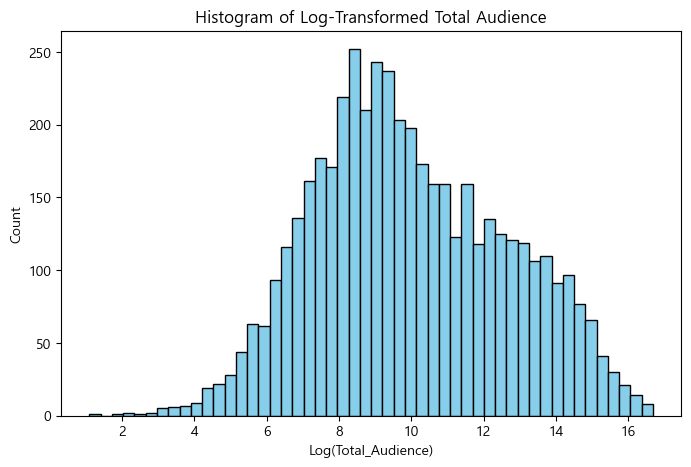

In [27]:
# 로그 변환 (log1p = log(1+x), 0값 처리 안정적)
Total_audience["Log_Total_Audience"] = np.log1p(Total_audience["Total_Audience"])

plt.figure(figsize=(8,5))
plt.hist(Total_audience["Log_Total_Audience"].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title("Histogram of Log-Transformed Total Audience")
plt.xlabel("Log(Total_Audience)")
plt.ylabel("Count")
plt.show()

[피드백]
- 총 관람객수가 정규 분포 형태가 아니더라도 그걸 로그 스케일로 정규화 시키는건 X
- 차라리 회귀분석에서의 잔차가 정규 분포 형태인지를 파악한 후에 로그스케일을 해야지 y값만을 보고 변환하는건 종속 변수를 무시하는 거다  
- 만약 1만 이하의 데이터를 제거하는건 절반 이상을 제거하는 것이므로 (부정적인말로) 조작이다. 
- 차라리 처음부터 수집하는 데이터를 -1만 이상 총 관람객을 기록한 영화-로 정의해라

In [13]:
# 지수표기 대신 일반 숫자로 표시
pd.options.display.float_format = '{:,.0f}'.format

# 다시 describe 실행
boxoffice["Audience_Count"].describe()

count     196,799
mean        9,410
std        43,389
min             0
25%            18
50%           120
75%         1,157
max     1,661,835
Name: Audience_Count, dtype: float64

In [7]:
# Date 변수가 문자열인지 datetime인지 확인--- 문자열이므로 datetime 변환 필요
print(boxoffice['Date'].dtype)

object


In [7]:
# 가정: boxoffice 데이터프레임에 ['Movie', 'Date', 'Audience_Count'] 존재
# Date가 문자열이기에 datetime으로 변환
boxoffice['Date'] = pd.to_datetime(boxoffice['Date'])

# 영화별 날짜 정렬
boxoffice = boxoffice.sort_values(['Movie_Title', 'Date'])

In [8]:
# 영화별 누적 관객 수 생성

boxoffice['Cumulative_Audience'] = boxoffice.groupby('Movie_Title')['Audience_Count'].cumsum()

# 주차별 관객 수
weekly_audience = (
    boxoffice.groupby(['Movie_Title','Week'])['Audience_Count']
    .sum()
    .reset_index(name='Weekly_Audience')  #일반 컬럼으로 바꾸고, 합계 컬럼의 이름을 'Weekly_Audience'로 지정
)

# 다시 원래 데이터에 merge
boxoffice = boxoffice.merge(weekly_audience, on=['Movie_Title','Week'], how='left')

In [9]:
boxoffice.head(10)

,Movie_Title,Release_Date,Audience_Count,Show_Count,Week,Date,Holiday,Moonhwa,Pandemic,now_showing,Total_Audience,Cumulative_Audience,Weekly_Audience
0,#살아있다,2020-06-24,204066,7223,1,2020-06-24,0,1,1,0,1899697,204066,1055995
1,#살아있다,2020-06-24,148991,7311,1,2020-06-25,0,0,1,0,1899697,353057,1055995
2,#살아있다,2020-06-24,152550,7839,1,2020-06-26,0,0,1,0,1899697,505607,1055995
3,#살아있다,2020-06-24,294255,9221,1,2020-06-27,1,0,1,0,1899697,799862,1055995
4,#살아있다,2020-06-24,256133,9044,1,2020-06-28,1,0,1,0,1899697,1055995,1055995
5,#살아있다,2020-06-24,67845,7111,2,2020-06-29,0,0,1,0,1899697,1123840,486928
6,#살아있다,2020-06-24,67098,7147,2,2020-06-30,0,0,1,0,1899697,1190938,486928
7,#살아있다,2020-06-24,51659,6137,2,2020-07-01,0,0,1,0,1899697,1242597,486928
8,#살아있다,2020-06-24,44470,5783,2,2020-07-02,0,0,1,0,1899697,1287067,486928
9,#살아있다,2020-06-24,51860,6066,2,2020-07-03,0,0,1,0,1899697,1338927,486928


- 대부분의 영화는 1주차에 관람객이 많고 2주차부터 점차 감소하는 추세임 -> 따라서 대부분의 영화는 성장율이 음수로 나올 것임 
- 이렇게 되면 성장률 변수가 대부분 음수라서, 모델 입장에서는 "성장률=감소폭" -> 예측 변수로 쓰기엔 정보량이 적을 수 있음
- Week1 대비 Week2 비율을 대신 사용하자. 감소폭을 0~1 사이 비율로 표현 (드물게 1 이상도 가능)
- 값이 0~1 사이(드물게 1보다 큰 경우도 존재)라서 안정적. "2주차에도 관객이 얼마나 남아있었는가?"라는 직관적인 해석 가능.

In [10]:
# 1주차와 2주차 데이터만 추출
week1 = weekly_audience[weekly_audience['Week'] == 1][['Movie_Title', 'Weekly_Audience']]
week2 = weekly_audience[weekly_audience['Week'] == 2][['Movie_Title', 'Weekly_Audience']]

# 컬럼명 변경
week1 = week1.rename(columns={'Weekly_Audience': 'Week1_Audience'})
week2 = week2.rename(columns={'Weekly_Audience': 'Week2_Audience'})

# 병합 (1주차 기준으로)
audience_ratio = pd.merge(week1, week2, on='Movie_Title', how='left')

audience_ratio['Week1_Audience'] = audience_ratio['Week1_Audience'].astype(float)
audience_ratio['Week2_Audience'] = audience_ratio['Week2_Audience'].astype(float)

# 비율 계산
audience_ratio['Week2_Week1_Ratio'] = audience_ratio['Week2_Audience'] / audience_ratio['Week1_Audience']

# 소수점 4자리까지 보기
pd.set_option('display.float_format', '{:.4f}'.format)

# audience_ratio를 boxoffice에 병합
boxoffice = boxoffice.merge(audience_ratio, on='Movie_Title', how='left')

In [11]:
print(audience_ratio.dtypes)

Movie_Title           object
Week1_Audience       float64
Week2_Audience       float64
Week2_Week1_Ratio    float64
dtype: object


In [12]:
# 결과 확인
boxoffice.head(10)

,Movie_Title,Release_Date,Audience_Count,Show_Count,Week,Date,Holiday,Moonhwa,Pandemic,now_showing,Total_Audience,Cumulative_Audience,Weekly_Audience,Week1_Audience,Week2_Audience,Week2_Week1_Ratio
0,#살아있다,2020-06-24,204066,7223,1,2020-06-24,0,1,1,0,1899697,204066,1055995,1055995.0000,486928.0000,0.4611
1,#살아있다,2020-06-24,148991,7311,1,2020-06-25,0,0,1,0,1899697,353057,1055995,1055995.0000,486928.0000,0.4611
2,#살아있다,2020-06-24,152550,7839,1,2020-06-26,0,0,1,0,1899697,505607,1055995,1055995.0000,486928.0000,0.4611
3,#살아있다,2020-06-24,294255,9221,1,2020-06-27,1,0,1,0,1899697,799862,1055995,1055995.0000,486928.0000,0.4611
4,#살아있다,2020-06-24,256133,9044,1,2020-06-28,1,0,1,0,1899697,1055995,1055995,1055995.0000,486928.0000,0.4611
5,#살아있다,2020-06-24,67845,7111,2,2020-06-29,0,0,1,0,1899697,1123840,486928,1055995.0000,486928.0000,0.4611
6,#살아있다,2020-06-24,67098,7147,2,2020-06-30,0,0,1,0,1899697,1190938,486928,1055995.0000,486928.0000,0.4611
7,#살아있다,2020-06-24,51659,6137,2,2020-07-01,0,0,1,0,1899697,1242597,486928,1055995.0000,486928.0000,0.4611
8,#살아있다,2020-06-24,44470,5783,2,2020-07-02,0,0,1,0,1899697,1287067,486928,1055995.0000,486928.0000,0.4611
9,#살아있다,2020-06-24,51860,6066,2,2020-07-03,0,0,1,0,1899697,1338927,486928,1055995.0000,486928.0000,0.4611


### 3. 그래프로 시각화

#### 1,2주차 관람객 비율 대 총관람객 수

<Axes: xlabel='Week2_Week1_Ratio', ylabel='Total_Audience'>

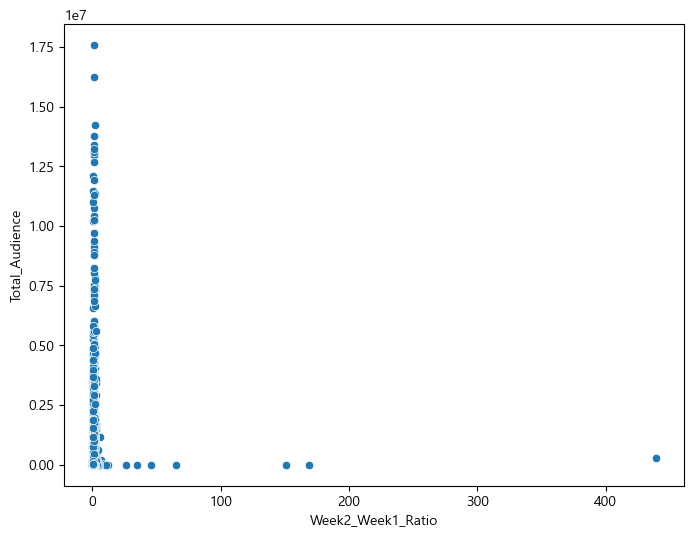

In [15]:
# 1,2주차 관람객 비율 별 총관람객수 

unique_one = boxoffice.drop_duplicates(subset=['Movie_Title', 'Week2_Week1_Ratio', 'Total_Audience'])


plt.figure(figsize=(8,6))
sns.scatterplot(x='Week2_Week1_Ratio', y='Total_Audience', data= unique_one)

In [ ]:
# 1,2주차 관람객 비율이 1이 넘으면서 총관람객 수가 1만명이 넘는 영화- 634개
unique_one[(unique_one["Week2_Week1_Ratio"]>=1) & (unique_one["Total_Audience"]>10000)]

,Movie_Title,Release_Date,Audience_Count,Show_Count,Week,Date,Holiday,Moonhwa,Pandemic,now_showing,Total_Audience,Cumulative_Audience,Weekly_Audience,Week1_Audience,Week2_Audience,Week2_Week1_Ratio
263,007 카지노 로얄,2006-12-21,50899,1383,1,2006-12-21,0,0,0,0,967429,50899,371707,371707.0000,395040.0000,1.0628
1011,1923 간토대학살,2024-08-15,641,31,1,2024-08-15,1,0,2,0,12182,641,2800,2800.0000,3736.0000,1.3343
1216,1987,2017-12-27,331736,6074,1,2017-12-27,0,1,0,0,7195829,331736,1906746,1906746.0000,2147221.0000,1.1261
1286,19곰 테드,2012-09-27,16024,975,1,2012-09-27,0,0,0,0,265774,16024,82348,82348.0000,134091.0000,1.6283
1382,1번가의 기적,2007-02-14,77877,1821,1,2007-02-14,0,0,0,0,2531692,77877,640853,640853.0000,929633.0000,1.4506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195902,히든 피겨스,2017-03-23,15834,1241,1,2017-03-23,0,0,0,0,434179,15834,124041,124041.0000,148204.0000,1.1948
195976,히든페이스,2024-11-20,48075,2569,1,2024-11-20,0,0,2,0,1003557,48075,343147,343147.0000,371063.0000,1.0814
196053,히말라야,2015-12-16,203173,4923,1,2015-12-16,0,0,0,0,7732506,203173,1504388,1504388.0000,2689578.0000,1.7878
196387,히트맨2,2025-01-22,100621,5598,1,2025-01-22,0,0,2,0,2544080,100621,601507,601507.0000,1363853.0000,2.2674


In [68]:
unique_one[(unique_one["Week2_Week1_Ratio"]>=1) & (unique_one["Total_Audience"]>100000)].shape[0]

376

In [69]:
unique_one[(unique_one["Week2_Week1_Ratio"]>=1) & (unique_one["Total_Audience"]>1000000)].shape[0]

207

신기하게도 흥행 영화들 중 비율이 1이 넘는 영화가 꽤 많다!

거의 대부분의 2주차 관람객 수/1주차 관람객 수 비율이 0-1 사잇값을 가지지만 그 이상의 값을 가지는 이상치가 있음

#### 분기별 개봉한 영화 수 

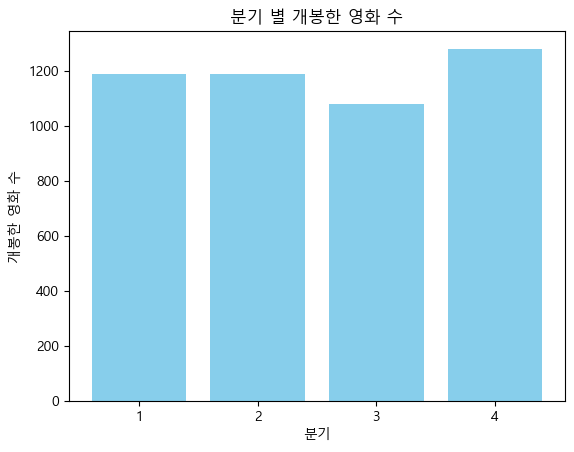

In [42]:
# 분기 별 개봉한 영화 확인하기
# 1분기: 1월, 2월, 3월 / 2분기: 4월, 5월, 6월 / 3분기: 7월, 8월, 9월/ 4분기: 10월, 11월, 12월


# Release_Date를 datetime으로 변환
boxoffice['Release_Date'] = pd.to_datetime(boxoffice['Release_Date'])

# 영화별 최초 개봉일만 추출
unique_movies = boxoffice[['Movie_Title', 'Release_Date']].drop_duplicates()

# 분기 계산
unique_movies['Quarter'] = unique_movies['Release_Date'].dt.quarter

# 분기별 영화 수 집계
quarter_counts = unique_movies['Quarter'].value_counts().sort_index()

# 그래프
plt.bar(quarter_counts.index, quarter_counts.values, color='skyblue')
plt.xlabel('분기')
plt.ylabel('개봉한 영화 수')
plt.title('분기 별 개봉한 영화 수')
plt.xticks([1,2,3,4])
plt.show()

4분기에 개봉한 영화가 제일 많은 것을 확인할 수 있음. 아무래도 연말, 크리스마스 특집 영화...

#### 주차별 관객 수 분포

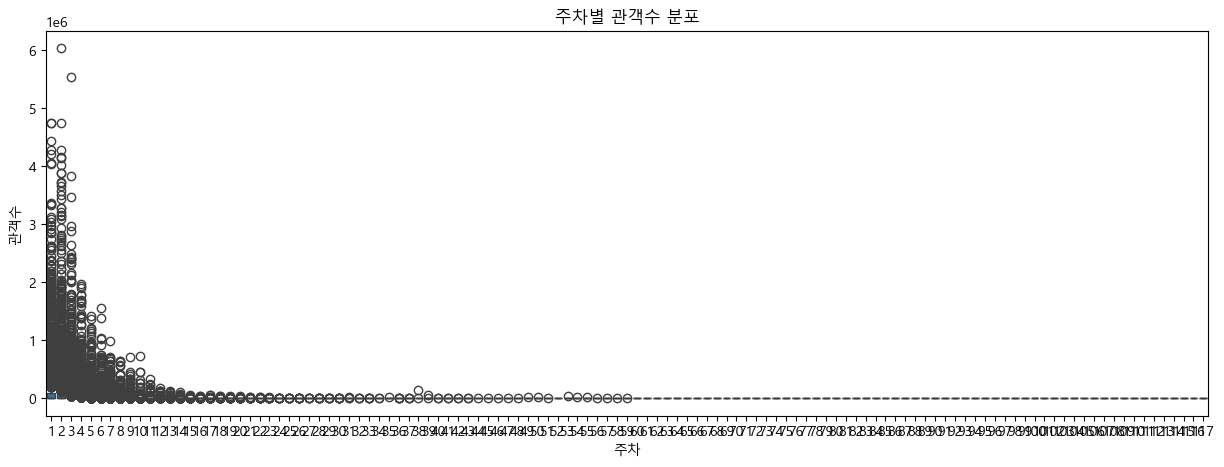

In [45]:
# 1주차 관객수 분포 (Histogram/Boxplot)
# 개봉 초반 성적을 비교하고, 영화별 차이를 확인 가능.

plt.figure(figsize=(15,5))
sns.boxplot(data=weekly_audience, x='Week', y='Weekly_Audience')
plt.title('주차별 관객수 분포')
plt.xlabel('주차')
plt.ylabel('관객수')
plt.show()

#### 상위 10편 영화 주차별 관객수 추이

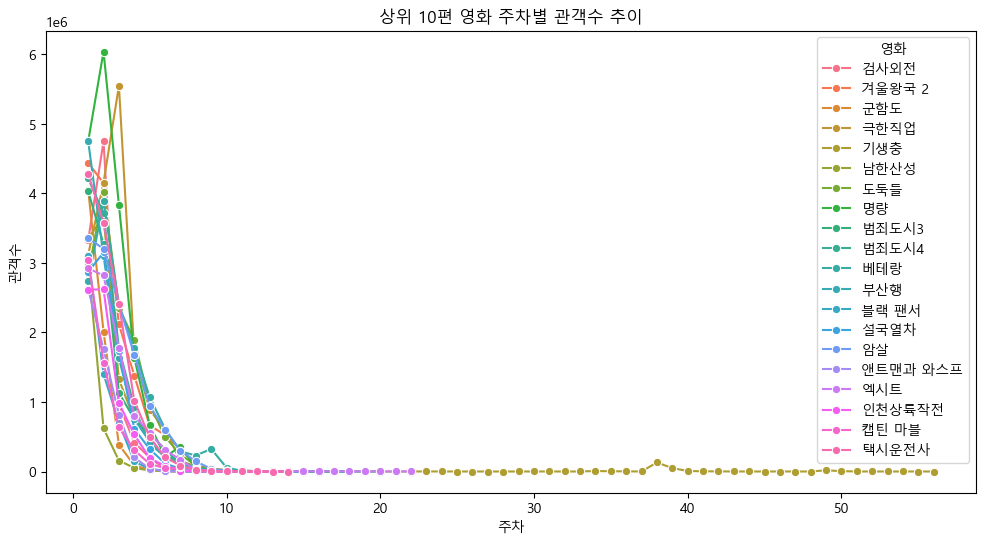

In [47]:
top_movies = weekly_audience[weekly_audience['Week']==1].nlargest(20, 'Weekly_Audience')['Movie_Title']

plt.figure(figsize=(12,6))
sns.lineplot(data=weekly_audience[weekly_audience['Movie_Title'].isin(top_movies)], 
             x='Week', y='Weekly_Audience', hue='Movie_Title', marker='o')
plt.title('상위 10편 영화 주차별 관객수 추이')
plt.xlabel('주차')
plt.ylabel('관객수')
plt.legend(title='영화')
plt.show()

#### 영화별 상영 주차 분포

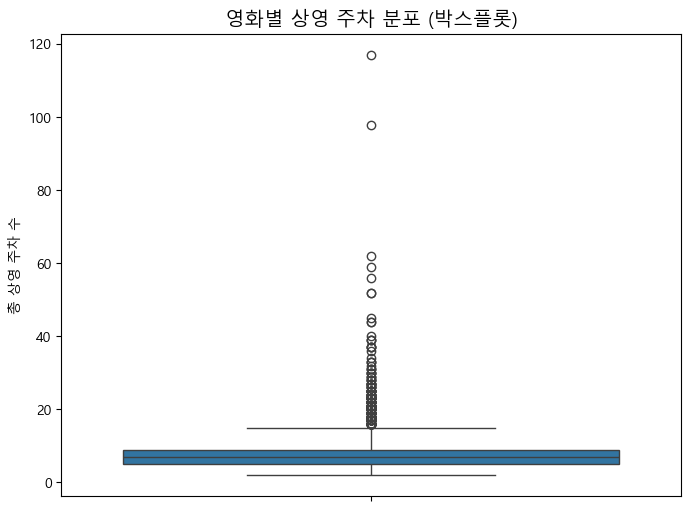

In [17]:
# 개봉주차 박스플롯 그려서 아상치 파악하기(위의 개봉주차가 117주나 되는 것처럼)

# 영화별 상영 주차 계산 (최대 week)
movie_weeks = boxoffice.groupby('Movie_Title')['Week'].max().reset_index(name='Total_Weeks')

# 박스플롯 그리기
plt.figure(figsize=(8,6))
sns.boxplot(y='Total_Weeks', data=movie_weeks)

plt.title('영화별 상영 주차 분포 (박스플롯)', fontsize=14)
plt.ylabel('총 상영 주차 수')
plt.show()

In [18]:
# 상영주차 사분위수 구하기

Q1 = movie_weeks['Total_Weeks'].quantile(0.25)
Q3 = movie_weeks['Total_Weeks'].quantile(0.75)
IQR = Q3 - Q1

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)

# 3. 이상치 기준
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("이상치 기준 (하한):", lower_bound)
print("이상치 기준 (상한):", upper_bound)

Q1: 5.0
Q3: 9.0
IQR: 4.0
이상치 기준 (하한): -1.0
이상치 기준 (상한): 15.0


In [19]:
outliers = movie_weeks[(movie_weeks['Total_Weeks'] < lower_bound) | 
                       (movie_weeks['Total_Weeks'] > upper_bound)]

print("이상치 영화 수:", len(outliers))
print(outliers.head())

이상치 영화 수: 265
       Movie_Title  Total_Weeks
23            1917           18
63              4등           16
67   5.18 힌츠페터 스토리           16
86        82년생 김지영           18
97  EBS친구들 씽씽 댄스파티           23


In [ ]:
out= movie_weeks[(movie_weeks['Total_Weeks'] > 30)]
print(len(out))
print(out)

27
             Movie_Title  Total_Weeks
299                 교회오빠           45
446           극장판 주술회전 0           59
460   극장판 하이큐!! 쓰레기장의 결전           37
483                  기생충           56
626               날씨의 아이           39
716                노매드랜드           32
933           더 퍼스트 슬램덩크           98
938          더 폴: 디렉터스 컷           37
1129                라라랜드           39
1289              로큰롤 인생           44
2062             블루 자이언트           36
2140           뿌까의 짜장면파티           34
2215                산상수훈          117
2279            서칭 포 슈가맨           40
2366                  소명           31
2475            스즈메의 문단속           52
2701                 아노라           31
2970                어파이어           33
3026   에브리씽 에브리웨어 올 앳 원스           62
3256                  용서           37
3305             울지마, 톤즈           37
3333                  원스           33
3365              위대한 침묵           52
3598                  장손           33
4089                   탑           31
4298     

장기 상영 영화들의 주요 특징

- 비주류 및 독립/예술 영화의 포함  
대형 흥행작 (기생충)뿐만 아니라, 교회오빠, 산상수훈, 로큰롤 인생처럼 다큐멘터리나 종교적/독립 영화로 추정되는 작품들 있음.  
이들은 주간 관람객 수는 적지만, 특정 전용 관객층을 바탕으로 오랜 기간 꾸준히 상영된다.  

- 높은 평가 또는 입소문의 힘
대다수의 장기 상영작은 국내외에서 비평적 호평을 받은 작품들입니다 (기생충, 라라랜드, 헤어질 결심).  
이는 개봉 초기의 하이프(Hype)가 사라진 후에도 긍정적인 입소문이 지속적으로 관람을 유도하는 주요 동력임을 시사함.  

- N차 관람 (Repeat Viewings)
더 퍼스트 슬램덩크 (98주)와 같은 작품은 원작의 강력한 팬덤이나 특별 상영 이벤트 등을 통해 관람객들이  
여러 번 영화를 보는 N차 관람의 효과를 극대화한 사례 (팬층을 확보하고 있는 애니메이션 영화의 특징으로 봐도 될듯)   

#### 1주차 대비 총 관람객 수

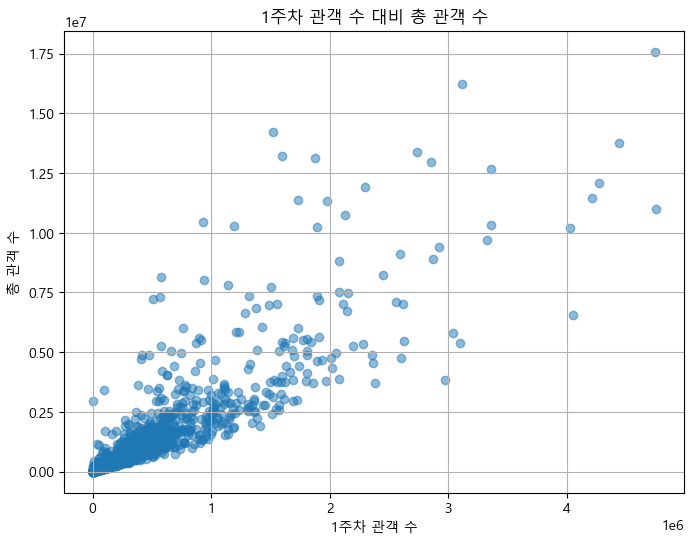

In [26]:
# 1주차 대비 총 관람객 수 

# 영화별 1주차 관객 수
week1_audience = (
    boxoffice[boxoffice['Week'] == 1]
    .groupby('Movie_Title')['Audience_Count']
    .sum()
    .reset_index(name='Week1_Audience')
)

# 영화별 총 관객 수
total_audience = (
    boxoffice.groupby('Movie_Title')['Audience_Count']
    .sum()
    .reset_index(name='Total_Audience')
)

# 두 데이터 병합
audience_compare = week1_audience.merge(total_audience, on='Movie_Title')


plt.figure(figsize=(8,6))
plt.scatter(audience_compare['Week1_Audience'], audience_compare['Total_Audience'], alpha=0.5)
plt.xlabel("1주차 관객 수")
plt.ylabel("총 관객 수")
plt.title("1주차 관객 수 대비 총 관객 수")
plt.grid(True)
plt.show()

* 1주차 관객 수가 많을수록 총 관객 수도 많아지는 경향을 명확하게 보여줌  
* 초기 흥행 성적(1주차)이 최종 흥행 결과를 예측하는 데 있어 가장 중요한 요인으로 파악됨  
* 초반의 관심(개봉 버프)**을 많이 받은 영화가 최종적으로도 성공할 확률이 높을 것   
* 그러나 점들이 선 주위에 완벽하게 모여 있지 않고 넓게 퍼져 있어 1주차 관객 수가 같더라도 최종 총 관객 수는 크게 차이 날 수 있음  
(1주차 관객 수 100만 200만 명 사이의 구간을 보면, 총 관객 수가 250만 명 정도에 머무는 영화가 있는 반면, 1,000만 명 이상을 기록하는 영화도 있음) 

상업 영화가 아닌 독립, 다큐멘터리 영화들은 이상치로 처리하고 빼는게 좋을까?

In [29]:
boxoffice.columns

Index(['Movie_Title', 'Release_Date', 'Audience_Count', 'Show_Count', 'Week',
       'Date', 'Holiday', 'Moonhwa', 'Pandemic', 'now_showing',
       'Total_Audience', 'Cumulative_Audience', 'Weekly_Audience',
       'Week1_Audience', 'Week2_Audience', 'Week2_Week1_Ratio'],
      dtype='object')

  Day_Type  Audience_Sum
0  Weekday     850520184
1  Holiday    1001305069
2  Moonhwa      40697429


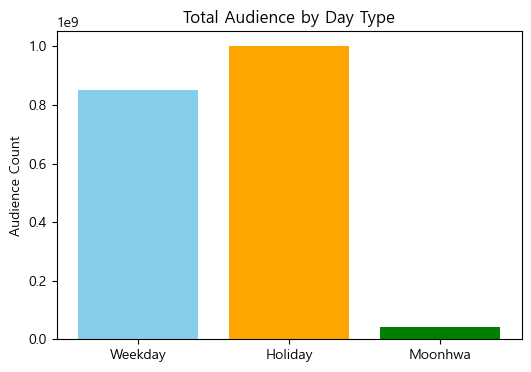

In [59]:
weekday_audience = boxoffice[boxoffice['Holiday']==0]['Audience_Count'].sum()
holiday_audience = boxoffice[boxoffice['Holiday']==1]['Audience_Count'].sum()
moonhwa_audience = boxoffice[boxoffice['Moonhwa']==1]['Audience_Count'].sum()

# 합계를 DataFrame으로 정리
day_summary = pd.DataFrame({
    'Day_Type': ['Weekday', 'Holiday', 'Moonhwa'],
    'Audience_Sum': [weekday_audience, holiday_audience, moonhwa_audience]
})

print(day_summary)

# 막대 그래프 그리기
plt.figure(figsize=(6,4))
plt.bar(day_summary['Day_Type'], day_summary['Audience_Sum'], color=['skyblue', 'orange', 'green'])
plt.title('Total Audience by Day Type')
plt.ylabel('Audience Count')
plt.show()

확실히 휴일의 관람객 수가 많긴 하지만... 한달에 한번 있는 문화의 날을 같은 선상에 두고 비교해도 되는지 모르겠다

#### 상관계수 파악

Text(0.5, 1.0, 'correlation')

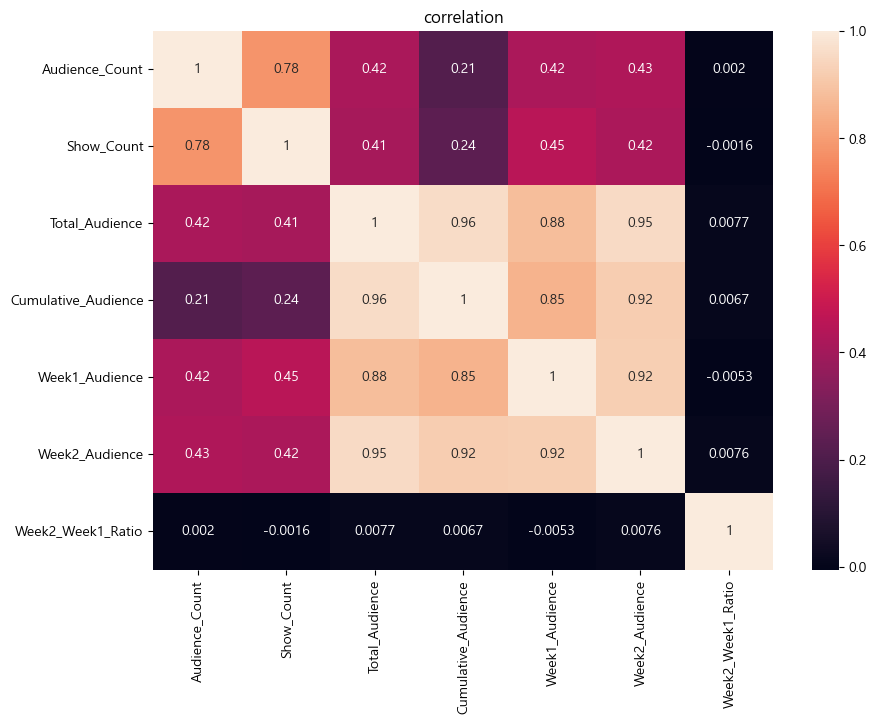

In [ ]:
# 수치형 변수들 간 상관계수 파악해보기(일단 문화의 날과 팬더믹은 제외하고)

corr_col=["Audience_Count","Show_Count","Total_Audience","Cumulative_Audience",
          "Week1_Audience","Week2_Audience","Week2_Week1_Ratio"]

plt.figure(figsize=(10,7))  
sns.heatmap(boxoffice[corr_col].corr(), annot=True)
plt.title("correlation")

### 4. movie_info 데이터 불러오기

In [27]:
info= pd.read_csv("C:/Users/강태희/Documents/BAF-25-2-Marketing/analysis/movie_info_data.csv")
info.head()

,Movie_Title,Main_Country,Grade,now_showing,director1,director2,director3,director4,director5,actor1,...,Distributor_6,Distributor_7,Distributor_8,genre1,genre2,genre3,genre4,genre5,genre6,genre7
0,#살아있다,한국,15세이상관람가,0,조일형,NaN,NaN,NaN,NaN,박신혜,...,NaN,NaN,NaN,드라마,NaN,NaN,NaN,NaN,NaN,NaN
1,#아이엠히어,프랑스,12세이상관람가,0,에릭 라티고,NaN,NaN,NaN,NaN,빈센트 네메스,...,NaN,NaN,NaN,멜로/로맨스,코미디,NaN,NaN,NaN,NaN,NaN
2,#위왓치유,기타,청소년관람불가,0,바르보라 차르포바,비트 클루삭,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,다큐멘터리,NaN,NaN,NaN,NaN,NaN,NaN
3,(여자)아이들 월드투어 [아이돌] 인 시네마,한국,12세이상관람가,0,오윤동,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,공연,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0MHz,한국,15세이상관람가,0,유선동,NaN,NaN,NaN,NaN,박명신,...,NaN,NaN,NaN,공포(호러),NaN,NaN,NaN,NaN,NaN,NaN


#### 배급사 분포 확인

           Distributor  Movie_Count
0            씨제이엔터테인먼트          168
1  유니버설픽쳐스인터내셔널 코리아(유)          163
2            (주)영화사 진진          137
3            (주)씨제이이엔엠          134
4        롯데쇼핑㈜롯데엔터테인먼트          129
5  (주)넥스트엔터테인먼트월드(NEW)          129
6               (주)쇼박스          125
7        워너브러더스 코리아(주)          124
8             (주)디스테이션          116
9           (주)팝엔터테인먼트          106


<Figure size 1000x600 with 0 Axes>

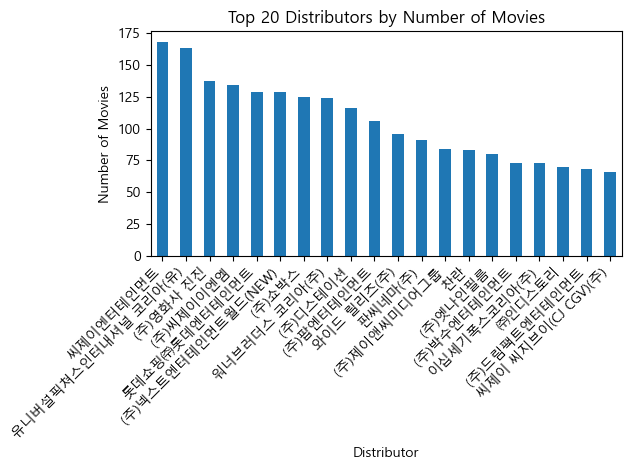

In [37]:
# Distributor 관련 컬럼만 추출
dist_cols = [col for col in info.columns if "Distributor" in col]

# 여러 Distributor 컬럼을 세로로 합치기
dist_df = info[dist_cols].melt(value_name="Distributor").dropna(subset=["Distributor"])

# 배급사별 영화 수 세기
dist_count = dist_df["Distributor"].value_counts().reset_index()
dist_count.columns = ["Distributor", "Movie_Count"]

print(dist_count.head(10))  # 상위 10개 출력

# 시각화 (막대 그래프)
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
dist_count.head(20).plot(kind="bar", x="Distributor", y="Movie_Count", legend=False)
plt.title("Top 20 Distributors by Number of Movies")
plt.ylabel("Number of Movies")
plt.xlabel("Distributor")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


#### 감독 빈도 파악

In [39]:
director_cols = [col for col in info.columns if "director" in col.lower()]
director_df = info[director_cols].melt(value_name="Director").dropna(subset=["Director"])
director_count = director_df["Director"].value_counts().reset_index()
director_count.columns = ["Director", "Count"]

print("감독 TOP 30")
print(director_count.head(30))

감독 TOP 30
      Director  Count
0          홍상수     25
1          오윤동     17
2       리들리 스콧     13
3          류승완     11
4    고레에다 히로카즈     10
5      미키 타카히로      9
6          조성규      9
7          이준익      9
8          정윤철      9
9    클린트 이스트우드      9
10    크리스토퍼 놀란      8
11    마틴 스코세이지      8
12    마이클 윈터바텀      8
13   페드로 알모도바르      8
14    스티븐 스필버그      8
15        이송희일      7
16         신연식      7
17   장 피에르 다르덴      7
18     데이빗 예이츠      7
19    스티븐 프리어즈      7
20    스티븐 소더버그      7
21         민규동      7
22       뤽 다르덴      7
23     프랑수아 오종      7
24   기예르모 델 토로      7
25         박찬욱      6
26         박훈정      6
27  데이비드 크로넨버그      6
28          장률      6
29         김성수      6


In [41]:
director_count[director_count["Count"]>=10]

,Director,Count
0,홍상수,25
1,오윤동,17
2,리들리 스콧,13
3,류승완,11
4,고레에다 히로카즈,10


어느정도의 기준으로 팬층이 확보된 감독으로 봐야할지 모르겠다...기준을 나눠서 가중치를 부여하면 좋을 거 같은데

#### 배우 빈도 파악

In [43]:
actor_cols = [col for col in info.columns if "actor" in col.lower()]
actor_df = info[actor_cols].melt(value_name="Actor").dropna(subset=["Actor"])
actor_count = actor_df["Actor"].value_counts().reset_index()
actor_count.columns = ["Actor", "Count"]

print("\n배우 TOP 30")
print(actor_count.head(30))


배우 TOP 30
        Actor  Count
0         박철민     24
1       리암 니슨     23
2         유해진     21
3      줄리안 무어     21
4   사무엘 L. 잭슨     20
5    로버트 드 니로     19
6     줄리엣 비노쉬     18
7         권해효     17
8      나오미 왓츠     17
9         하정우     17
10   니콜라스 케이지     17
11    제이크 질렌할     17
12     니콜 키드먼     16
13        송강호     16
14       휴 잭맨     16
15        박해일     16
16        김강우     16
17    안젤리나 졸리     16
18      맷 데이먼     16
19    제라드 버틀러     16
20        정유미     16
21        안성기     16
22        황정민     15
23     앤 해서웨이     15
24   마이클 패스벤더     15
25    브래들리 쿠퍼     14
26     메릴 스트립     14
27     다코타 패닝     14
28     모건 프리먼     14
29    이완 맥그리거     14


In [48]:
# 'genre1'부터 'genre7'까지의 열 이름을 리스트로 만듭니다.
genre_cols = [col for col in info.columns if col.startswith('genre') and col[5:].isdigit()]

# 각 영화의 모든 장르를 하나의 리스트로 통합하는 함수
def combine_genres(row):
    genres = [row[col] for col in genre_cols if pd.notna(row[col])]
    return genres

# 새로운 'All_Genres' 열을 생성합니다.
info['All_Genres'] = info.apply(combine_genres, axis=1)

# 'All_Genres' 리스트를 각 행으로 펼치는 함수 (분석을 위해)
genres_df = info[['Movie_Title', 'Main_Country', 'Grade', 'All_Genres']].explode('All_Genres')
genres_df = genres_df.rename(columns={'All_Genres': 'Genre'})

C:\Users\강태희\AppData\Local\Temp\ipykernel_18880\3334951345.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")
C:\Users\강태희\AppData\Local\Temp\ipykernel_18880\3334951345.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")


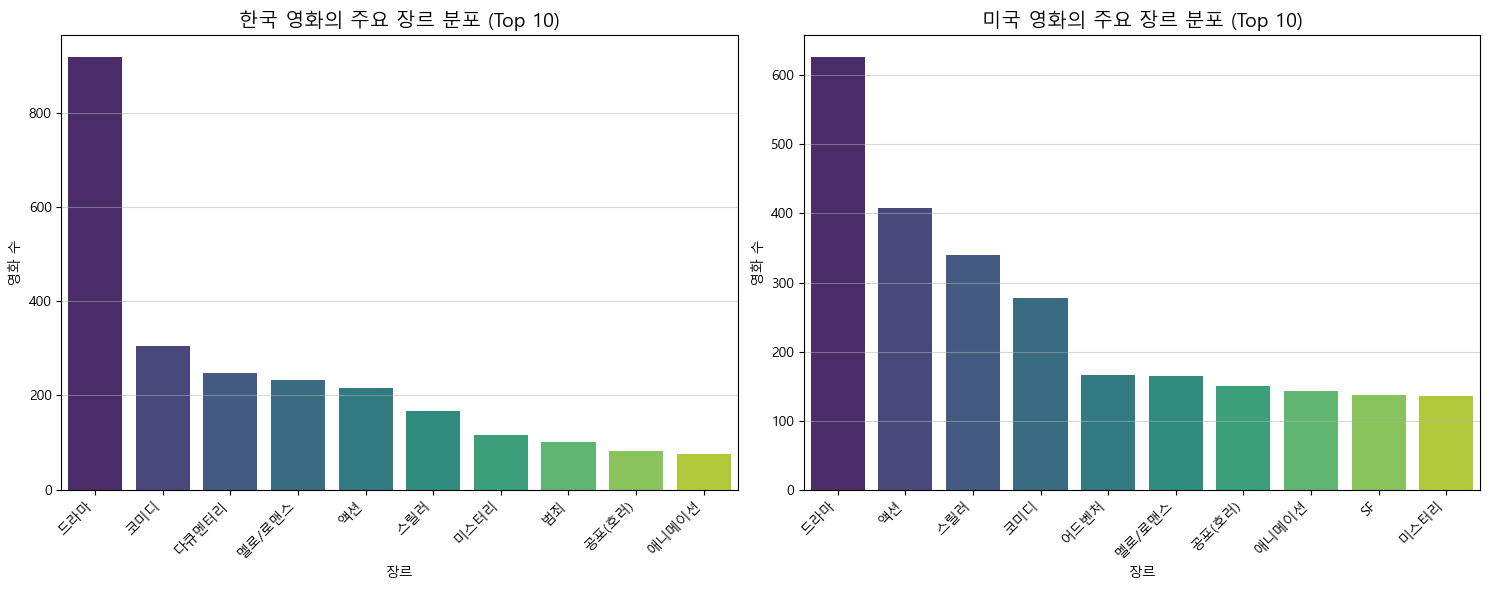


--- 국가별 주요 장르 분석 결과 ---
한국 영화 주요 장르: ['드라마', '코미디', '다큐멘터리']
미국 영화 주요 장르: ['드라마', '액션', '스릴러']


In [52]:
# 분석 대상 국가 설정
target_countries = ['한국', '미국']
country_genre_df = genres_df[genres_df['Main_Country'].isin(target_countries)]

plt.figure(figsize=(15, 6))

for i, country in enumerate(target_countries):
    plt.subplot(1, 2, i + 1)
    
    # 해당 국가의 장르 빈도 계산 (Top 10)
    genre_counts = country_genre_df[country_genre_df['Main_Country'] == country]['Genre'].value_counts().nlargest(10)
    
    # 시각화
    sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")
    plt.title(f'{country} 영화의 주요 장르 분포 (Top 10)', fontsize=14)
    plt.xlabel('장르')
    plt.ylabel('영화 수')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.5)

plt.tight_layout()
plt.show()

print("\n--- 국가별 주요 장르 분석 결과 ---")
for country in target_countries:
    top_genres = country_genre_df[country_genre_df['Main_Country'] == country]['Genre'].value_counts().nlargest(3)
    print(f"{country} 영화 주요 장르: {top_genres.index.tolist()}")

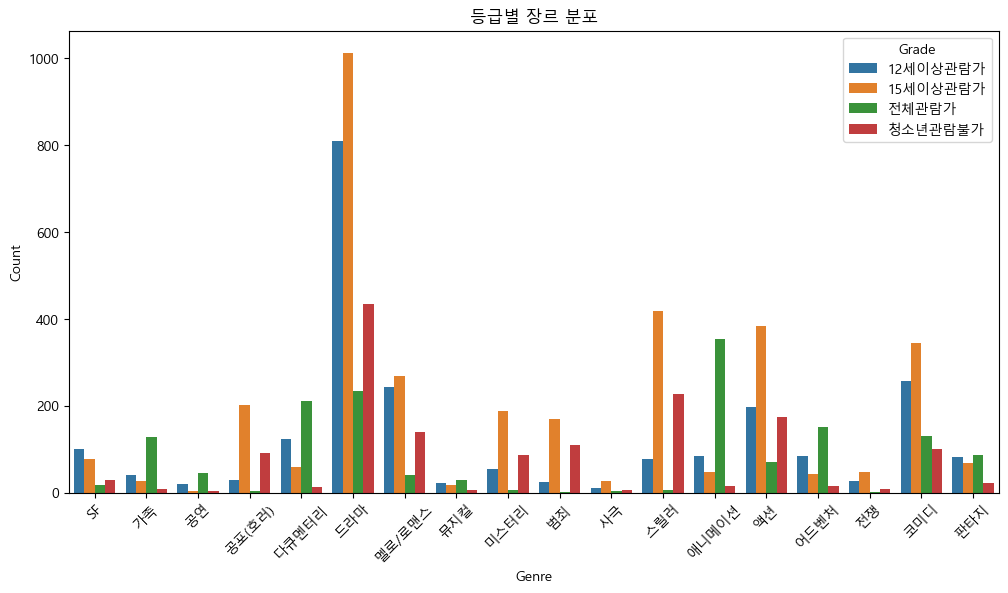

In [54]:
df_grade = info.melt(id_vars=['Grade'], value_vars=genre_cols, value_name='Genre').dropna()

# 장르별 등급별 개수
grade_genre_counts = df_grade.groupby(['Grade', 'Genre']).size().reset_index(name='Count')

# 시각화
plt.figure(figsize=(12,6))
sns.barplot(data=grade_genre_counts, x='Genre', y='Count', hue='Grade')
plt.xticks(rotation=45)
plt.title('등급별 장르 분포')
plt.show()